In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

In [ ]:
file_path = '/content/501.csv'
data = pd.read_csv(file_path)

data_info = {
    "First Few Rows": data.head(),
    "Data Types": data.dtypes,
    "Missing Values": data.isnull().sum()
}

data_info

{'First Few Rows':                  timestamp    back_x    back_y    back_z   thigh_x   thigh_y  \
 0  2021-03-24 14:42:03.839 -0.999023 -0.063477  0.140625 -0.980469 -0.112061   
 1  2021-03-24 14:42:03.859 -0.980225 -0.079346  0.140625 -0.961182 -0.121582   
 2  2021-03-24 14:42:03.880 -0.950195 -0.076416  0.140625 -0.949463 -0.080566   
 3  2021-03-24 14:42:03.900 -0.954834 -0.059082  0.140381 -0.957520 -0.046143   
 4  2021-03-24 14:42:03.920 -0.972412 -0.042969  0.142822 -0.977051 -0.023682   
 
     thigh_z  label  
 0 -0.048096      6  
 1 -0.051758      6  
 2 -0.067139      6  
 3 -0.050781      6  
 4 -0.026611      6  ,
 'Data Types': timestamp     object
 back_x       float64
 back_y       float64
 back_z       float64
 thigh_x      float64
 thigh_y      float64
 thigh_z      float64
 label          int64
 dtype: object,
 'Missing Values': timestamp    0
 back_x       0
 back_y       0
 back_z       0
 thigh_x      0
 thigh_y      0
 thigh_z      0
 label        0
 dtype: i

In [ ]:
data.head()

,timestamp,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label
0,2021-03-24 14:42:03.839,-0.999023,-0.063477,0.140625,-0.980469,-0.112061,-0.048096,6
1,2021-03-24 14:42:03.859,-0.980225,-0.079346,0.140625,-0.961182,-0.121582,-0.051758,6
2,2021-03-24 14:42:03.880,-0.950195,-0.076416,0.140625,-0.949463,-0.080566,-0.067139,6
3,2021-03-24 14:42:03.900,-0.954834,-0.059082,0.140381,-0.957520,-0.046143,-0.050781,6
4,2021-03-24 14:42:03.920,-0.972412,-0.042969,0.142822,-0.977051,-0.023682,-0.026611,6


In [ ]:
# Convert timestamp to datetime
data['timestamp'] = pd.to_datetime(data['timestamp'])

# Adjust labels to start from 0
data['label'] = data['label'] - 1

# Separate features and labels
X = data[['back_x', 'back_y', 'back_z', 'thigh_x', 'thigh_y', 'thigh_z']]
y = data['label']

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Determine the number of unique labels for output layer
num_classes = y.nunique() + 1  # Add 1 to account for 0-based indexing

In [ ]:
num_classes

8

In [ ]:
# Define and compile the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                448       
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 8)                 520       
                                                                 
Total params: 5128 (20.03 KB)
Trainable params: 5128 (20.03 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Callback for early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

In [ ]:
# Training the model
history = model.fit(X_train, y_train, epochs=20, validation_split=0.1, callbacks=[early_stopping])

Epoch 1/20
2337/2337 [==============================] - 5s 2ms/step - loss: 0.3231 - accuracy: 0.9113 - val_loss: 0.1512 - val_accuracy: 0.9593
Epoch 2/20
2337/2337 [==============================] - 4s 2ms/step - loss: 0.1887 - accuracy: 0.9508 - val_loss: 0.1319 - val_accuracy: 0.9621
Epoch 3/20
2337/2337 [==============================] - 4s 2ms/step - loss: 0.1721 - accuracy: 0.9546 - val_loss: 0.1260 - val_accuracy: 0.9659
Epoch 4/20
2337/2337 [==============================] - 4s 2ms/step - loss: 0.1660 - accuracy: 0.9555 - val_loss: 0.1231 - val_accuracy: 0.9652
Epoch 5/20
2337/2337 [==============================] - 4s 2ms/step - loss: 0.1603 - accuracy: 0.9567 - val_loss: 0.1221 - val_accuracy: 0.9661
Epoch 6/20
2337/2337 [==============================] - 4s 2ms/step - loss: 0.1572 - accuracy: 0.9574 - val_loss: 0.1196 - val_accuracy: 0.9656
Epoch 7/20
2337/2337 [==============================] - 4s 2ms/step - loss: 0.1542 - accuracy: 0.9583 - val_loss: 0.1189 - val_accuracy:

In [ ]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

650/650 [==============================] - 1s 1ms/step - loss: 0.1205 - accuracy: 0.9652
Test Accuracy: 96.52%


In [ ]:
# Save the model
model.save('activity_classifier_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


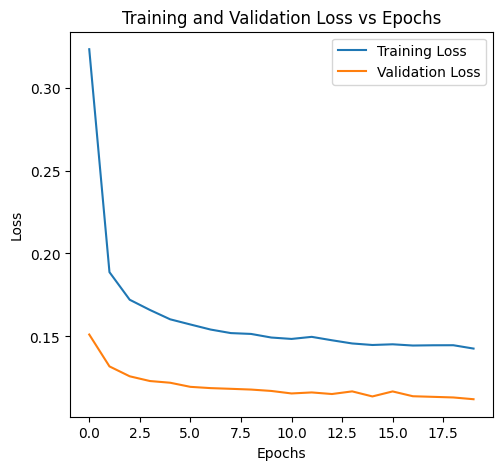

In [ ]:
# Plotting
plt.figure(figsize=(12, 5))

# Loss Plots
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

<Figure size 1200x500 with 0 Axes>

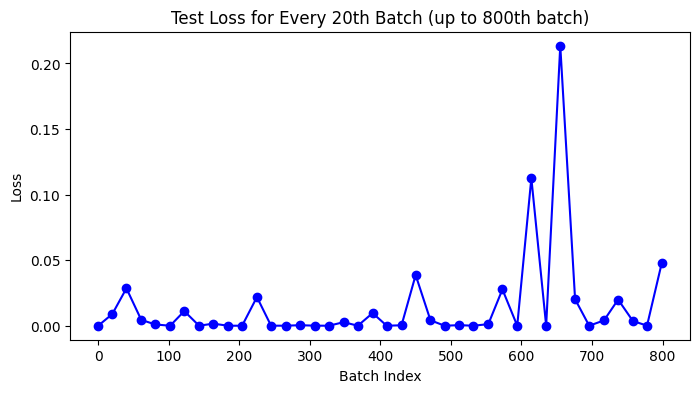

In [ ]:
# Plotting
plt.figure(figsize=(12, 5))

# Test loss per batch (assumption: model evaluates every 20th batch)
test_batches = 800 // 20
test_indices = np.linspace(0, min(799, len(X_test) - 1), num=test_batches, dtype=int)
test_loss_batches = [model.evaluate(X_test[i:i+1], y_test[i:i+1], verbose=0)[0] for i in test_indices]

plt.figure(figsize=(8, 4))
plt.plot(test_indices, test_loss_batches, marker='o', linestyle='-', color='b')
plt.title('Test Loss for Every 20th Batch (up to 800th batch)')
plt.xlabel('Batch Index')
plt.ylabel('Loss')
plt.show()